In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [9]:
import os
import sys
ROOTPATH = os.getcwd()
sys.path.append(os.path.join(ROOTPATH, r'external/template'))

# Load the data

In [70]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [12]:
y.shape, tx.shape

((10000,), (10000, 2))

In [55]:
x

array([ 1.94406149,  0.62753668,  2.01244346, ..., -0.64968792,
        0.69312469, -1.14970831])

In [16]:
tx.T

array([[ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 1.94406149,  0.62753668,  2.01244346, ..., -0.64968792,
         0.69312469, -1.14970831]])

### NB: throughout this laboratory the data has the following format: 
  * there are **N = 10000** data entries
  * **y** represents the column vector containing weight information -- that which we wish to predict/the output (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,)**.
  * **tx** represents the matrix $\tilde{X}$ formed by laterally concatenating a column vector of 1s to the column vector of height information -- the input data (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,2)**.

# 1. Computing the Cost Function
Fill in the `compute_loss` function below:

In [19]:
def compute_loss(y, tx, w):
    """Calculate the loss using either MSE or MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    # ***************************************************
    err = y - tx.dot(w)

    return np.average(err ** 2) / 2
    # ***************************************************
    raise NotImplementedError

# 2. Grid Search

Fill in the function `grid_search()` below:

In [34]:
# from costs import *


def grid_search(y, tx, grid_w0, grid_w1):
    """Algorithm for grid search.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        grid_w0: numpy array of shape=(num_grid_pts_w0, ). A 1D array containing num_grid_pts_w0 values of parameter w0 to be tested in the grid search.
        grid_w1: numpy array of shape=(num_grid_pts_w1, ). A 1D array containing num_grid_pts_w1 values of parameter w1 to be tested in the grid search.

    Returns:
        losses: numpy array of shape=(num_grid_pts_w0, num_grid_pts_w1). A 2D array containing the loss value for each combination of w0 and w1
    """

    losses = np.zeros((len(grid_w0), len(grid_w1)))
    # ***************************************************
    for i, w0 in enumerate(grid_w0):
        for j, w1 in enumerate(grid_w1):
            w = np.array([w0, w1])
            losses[i, j] = compute_loss(y, tx, w)
            
    # ***************************************************
    #raise NotImplementedError
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=42.42448314678248, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.009 seconds


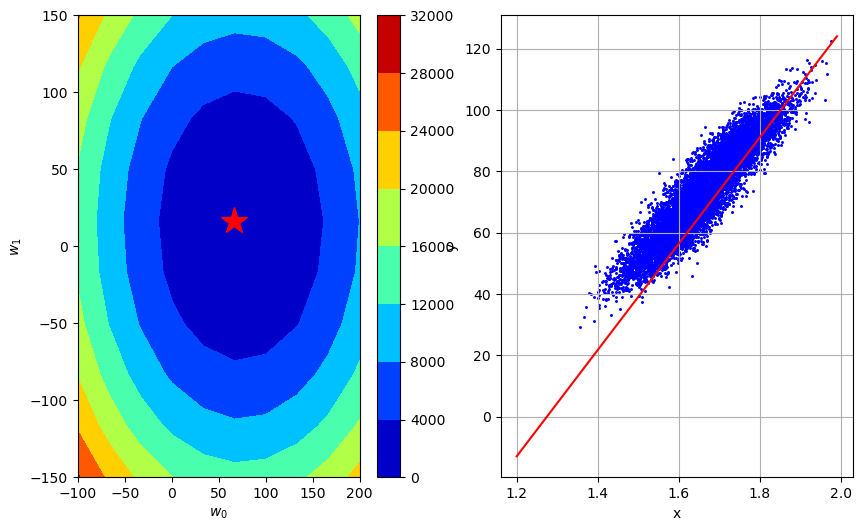

In [35]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print(
    "Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
        l=loss_star, w0=w0_star, w1=w1_star, t=execution_time
    )
)

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0, 6.0)
fig.savefig("grid_plot")  # Optional saving

# 3. Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [98]:
def compute_gradient(y, tx, w):
    """Computes the gradient at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        An numpy array of shape (2, ) (same shape as w), containing the gradient of the loss at w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    err = y - tx.dot(w)
    partial_w0 = -np.average(err)
    partial_w1 = -np.average(err * tx[:, 1])
    return np.array([partial_w0, partial_w1])
    # ***************************************************
    raise NotImplementedError

Please fill in the functions `gradient_descent` below:

In [99]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """The Gradient Descent (GD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of GD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of GD
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        loss = compute_loss(y, tx, w)
        grad = compute_gradient(y, tx, w)
        # ***************************************************
        #raise NotImplementedError
        # ***************************************************
        w -= gamma * grad
        # ***************************************************
        #raise NotImplementedError

        # store w and loss
        ws.append(w)
        losses.append(loss)
        print(
            "GD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [57]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1

# Initialization
w_initial = np.array([0, 0], dtype=float)

# Start gradient descent.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

[109.81967768  73.68895452  96.58434842 ...  58.32779473  74.38901745
  51.59669261]
[-73.293922   -13.47971243]
[0. 0.]
GD iter. 0/49: loss=2792.2367127591674, w0=7.329392200210518, w1=1.347971243498897
[99.8697465  65.51366093 86.54224031 ... 51.87416316 66.12531311
 45.81707416]
[-65.9645298  -12.13174119]
[7.3293922  1.34797124]
GD iter. 1/49: loss=2264.6350560300034, w0=13.925845180399985, w1=2.5611453626479053
[90.91480843 58.15589669 77.50434301 ... 46.06589474 58.6879792
 40.61541754]
[-59.36807682 -10.91856707]
[13.92584518  2.56114536]
GD iter. 2/49: loss=1837.2777140793803, w0=19.862652862570506, w1=3.653002069882013
[82.85536416 51.53390888 69.37023545 ... 40.83845317 51.99437868
 35.93392659]
[-53.43126914  -9.82671037]
[19.86265286  3.65300207]
GD iter. 3/49: loss=1491.1182670993755, w0=25.205779776523972, w1=4.63567310639271
[75.60186433 45.57411984 62.04953863 ... 36.13375575 45.97013821
 31.72058474]
[-48.08814223  -8.84403933]
[25.20577978  4.63567311]
GD iter. 4/49: 

In [58]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4. Stochastic gradient descent

In [82]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient at w from just few examples n and their corresponding y_n labels.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the stochastic gradient of the loss at w.
    """

    # ***************************************************
    err = y - tx.dot(w)
    partial_w0 = -np.average(err)
    partial_w1 = -np.average(err * tx[:, 1])
    return np.array([partial_w0, partial_w1])
    # ***************************************************
    raise NotImplementedError


def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic Gradient Descent algorithm (SGD).

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic gradient
        max_iters: a scalar denoting the total number of iterations of SGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    label = np.arange(len(tx))
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        np.random.shuffle(label)
        for start in range(0, len(label), batch_size):
            end = start + batch_size if start + batch_size < len(label) else len(label)
            grad = compute_stoch_gradient(y[label][start:end], tx[label][start:end], w)
            w -= gamma * grad
        # ***************************************************
        #raise NotImplementedError
        loss = compute_loss(y, tx, w)
        losses.append(loss)
        ws.append(w)

        print(
            "SGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    return losses, ws

In [91]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 2000

# Initialization
w_initial = np.array([0, 0], dtype=float)

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/49: loss=15.39781497694162, w0=73.1424145555957, w1=13.449717270768618
SGD iter. 1/49: loss=15.388958643574087, w0=73.36779838548397, w1=13.453562301753355
SGD iter. 2/49: loss=15.389428416726526, w0=73.37739478575993, w1=13.49036091765936
SGD iter. 3/49: loss=15.391445162067917, w0=73.37374010698707, w1=13.548586643587779
SGD iter. 4/49: loss=15.387376144882833, w0=73.27624969789996, w1=13.428096141331482
SGD iter. 5/49: loss=15.389500606607907, w0=73.378637557932, w1=13.472730303654592
SGD iter. 6/49: loss=15.391583367067252, w0=73.23819944783376, w1=13.388685002743761
SGD iter. 7/49: loss=15.388178414066196, w0=73.23891409979382, w1=13.440276142606303
SGD iter. 8/49: loss=15.388438511640746, w0=73.28380983409971, w1=13.55041625158282
SGD iter. 9/49: loss=15.392714218871925, w0=73.3672546676769, w1=13.3887452967182
SGD iter. 10/49: loss=15.402247513677779, w0=73.2274188632736, w1=13.64792843369994
SGD iter. 11/49: loss=15.389611635616724, w0=73.34059512122995, w1=13.40712

In [92]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses,
        sgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5. Effect of Outliers and MAE Cost Function

In [102]:
import datetime
from helpers import *

# ***************************************************
height, weight, gender = load_data(sub_sample=True, add_outlier=True)
# ***************************************************
#raise NotImplementedError

x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [103]:
y.shape, tx.shape

((202,), (202, 2))

In [104]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0], dtype=float)

# Start gradient descent.
start_time = datetime.datetime.now()

# ***************************************************
# INSERT YOUR CODE HERE
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
# ***************************************************
#raise NotImplementedError


end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=2869.8351145358524, w0=51.84746409844846, w1=7.724426406192431
GD iter. 1/49: loss=318.2821247015955, w0=67.401703327983, w1=10.041754328050118
GD iter. 2/49: loss=88.6423556165126, w0=72.06797509684336, w1=10.736952704607411
GD iter. 3/49: loss=67.9747763988552, w0=73.46785662750146, w1=10.945512217574596
GD iter. 4/49: loss=66.11469426926604, w0=73.88782108669889, w1=11.00808007146475
GD iter. 5/49: loss=65.94728687760302, w0=74.01381042445813, w1=11.026850427631796
GD iter. 6/49: loss=65.93222021235334, w0=74.0516072257859, w1=11.03248153448191
GD iter. 7/49: loss=65.93086421248088, w0=74.06294626618423, w1=11.034170866536945
GD iter. 8/49: loss=65.93074217249236, w0=74.06634797830372, w1=11.034677666153454
GD iter. 9/49: loss=65.93073118889338, w0=74.06736849193958, w1=11.034829706038407
GD iter. 10/49: loss=65.93073020036948, w0=74.06767464603033, w1=11.034875318003893
GD iter. 11/49: loss=65.93073011140233, w0=74.06776649225755, w1=11.03488900159354
GD iter. 1

In [105]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 6. Subgradient descent

In [109]:
def compute_subgradient_mae(y, tx, w):
    """Compute a subgradient of the MAE at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the subgradient of the MAE at w.
    """
    # ***************************************************
    err = y - tx.dot(w)
    sgn = err.copy()
    sgn[err < 0] = -1
    sgn[err > 0] = 1
    sgn[err == 0] = np.random.uniform(low=-1, high=1, size=sum(err == 0))
    return np.array([-np.average(sgn), -np.average(sgn * tx[:, 1])])

    # ***************************************************
    raise NotImplementedError

In [112]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """The SubGradient Descent (SubGD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubGD
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        loss = np.average(np.abs(y - tx.dot(w)))
        grad = compute_subgradient_mae(y, tx, w)
        # ***************************************************
        #raise NotImplementedError
        # ***************************************************
        w -= gamma * grad
        # ***************************************************
        #raise NotImplementedError

        ws.append(w)
        losses.append(loss)
        print(
            "SubGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

In [113]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0], dtype=float)

# Start SubSGD.
start_time = datetime.datetime.now()
subgd_losses, subgd_ws = subgradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubGD: execution time={t:.3f} seconds".format(t=exection_time))

SubGD iter. 0/499: loss=74.06780585492638, w0=0.7, w1=7.879285782686259e-16
SubGD iter. 1/499: loss=73.36780585492637, w0=1.4, w1=1.5758571565372517e-15
SubGD iter. 2/499: loss=72.66780585492637, w0=2.0999999999999996, w1=2.3637857348058776e-15
SubGD iter. 3/499: loss=71.96780585492637, w0=2.8, w1=3.1517143130745034e-15
SubGD iter. 4/499: loss=71.26780585492638, w0=3.5, w1=3.939642891343129e-15
SubGD iter. 5/499: loss=70.56780585492638, w0=4.2, w1=4.727571469611755e-15
SubGD iter. 6/499: loss=69.86780585492637, w0=4.9, w1=5.515500047880381e-15
SubGD iter. 7/499: loss=69.16780585492639, w0=5.6000000000000005, w1=6.303428626149007e-15
SubGD iter. 8/499: loss=68.46780585492638, w0=6.300000000000001, w1=7.091357204417633e-15
SubGD iter. 9/499: loss=67.76780585492638, w0=7.000000000000001, w1=7.879285782686259e-15
SubGD iter. 10/499: loss=67.06780585492638, w0=7.700000000000001, w1=8.667214360954884e-15
SubGD iter. 11/499: loss=66.36780585492637, w0=8.4, w1=9.45514293922351e-15
SubGD iter. 

In [ ]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subgd_losses,
        subgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subgd_ws)))

# Stochastic Subgradient Descent

**NB** for the computation of the subgradient you can reuse the `compute_subgradient` method that you implemented above, just making sure that you pass in a minibatch as opposed to the full data.

In [ ]:
def stochastic_subgradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic SubGradient Descent algorithm (SubSGD).

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic subgradient
        max_iters: a scalar denoting the total number of iterations of SubSGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubSGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubSGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: implement stochastic subgradient descent.
        # ***************************************************
        raise NotImplementedError

        print(
            "SubSGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    return losses, ws

In [ ]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subsgd_losses, subsgd_ws = stochastic_subgradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubSGD: execution time={t:.3f} seconds".format(t=exection_time))

In [ ]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subsgd_losses,
        subsgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subsgd_ws)))